In [179]:
#Import
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
from math import sqrt
from sklearn.neighbors import DistanceMetric




In [13]:
df = pd.read_excel('Data.xls', sheet_name='Feuille1') 

In [158]:
#print(df.head)
print(df.columns)
#print(df["TransactionDate"])

date = df["TransactionDate"][1]
print(date)
print(type(date))

print(str(df["CategoryTag"][10])=="nan")




Index(['UpdateBatchId', 'AccountId', 'AccountType', 'AccountName',
       'AccountNumberLast4', 'TransactionId', 'TransactionType',
       'TransactionDate', 'CleanedTransactionDescription', 'TransactionAmount',
       'TransactionDate.1', 'MerchantTag', 'CategoryTag', 'RecurringSeriesId'],
      dtype='object')
2016-12-12 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
True


## Question 1
In order to display the spending per transaction category, we have to sum for each type of transactions. 


In [160]:
## This function give us the average spending per category 
min_date = df["TransactionDate.1"].min()
max_date = df["TransactionDate.1"].max()


def average_per_category(df, start_date = min_date , end_date = max_date):
    """
    df : Pandas data frame with specific columns
    start_date : date where we can start counting
    end_date : date where we are no longer counting
    
    """
    if end_date < start_date: 
        (end_date,start_date) = (start_date, min_date)
    
    dict_of_categories = {}
    for index,row in df.iterrows():
        category = row['CategoryTag']
        if row["TransactionDate.1"] >= start_date and row["TransactionDate.1"] <= end_date and row["TransactionType"] == 'debit':
            try: 
                dict_of_categories[category][0] += dict_of_categories[row['TransactionAmount']]
                dict_of_categories[category][1] += 1
            except KeyError: 
                if  str(category) != 'nan':
                    dict_of_categories[category] = [row['TransactionAmount'],1]

    
    return dict_of_categories


To consider different periods of time the user should specify the end_date and the start_date.
By default the start_date is the most ancient date in the data_set. Use the to_datetime for convert your date into the correct type.

You can change the code below to specify the argument of the function

In [161]:
date = pd.to_datetime("10-1-2017")
print(date.month_name())
print(date.day)
print(date.year)

### If you need to specify the next 10 months

new_date = date + pd.DateOffset(months=10)
print(new_date.month_name())
print(new_date.day)
print(new_date.year)



October
1
2017
August
1
2018


The end date is : 2019-01-02 00:00:00
['Finance & Insurance', 'Accomodation', 'Flights', 'Credit Card Payment', 'Phone', 'Mobile Wallet Deposit', 'Internet', 'Clothing', 'Personal Care', 'Home & Garden']


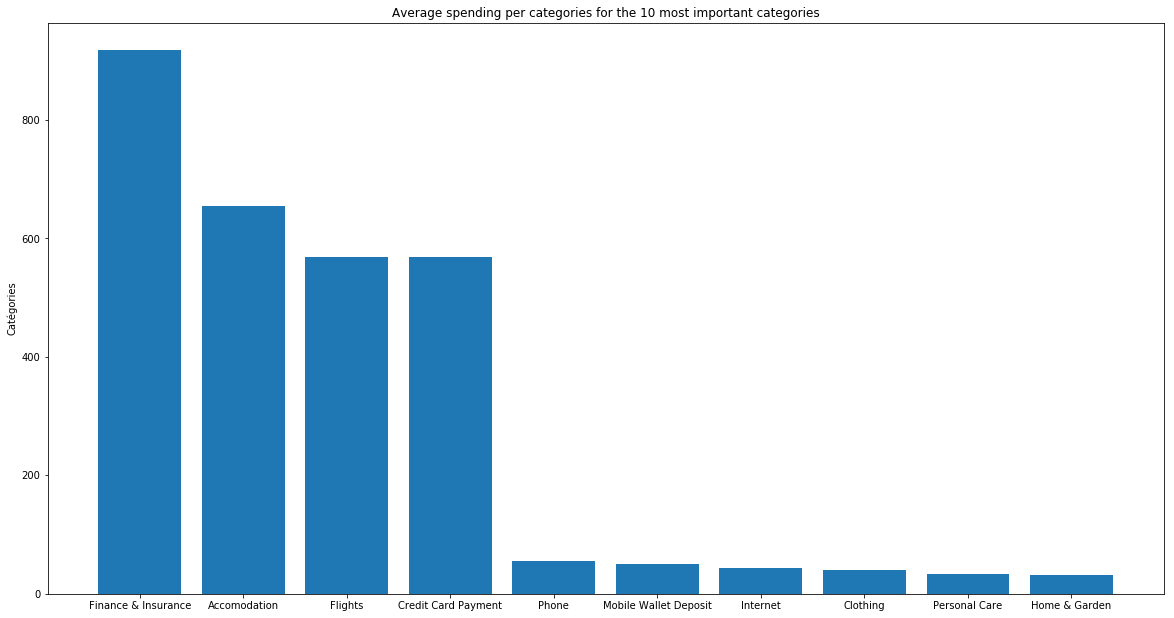

In [166]:
next_year = min_date + pd.DateOffset(months = 12)
print("The end date is : {}".format(next_year ))

dict_of_categories = average_per_category(df=df, start_date = min_date, end_date = next_year)

labels = dict_of_categories.keys()
sizes_labels = []
for category in labels :
    sizes_labels += [(dict_of_categories[category][0]/dict_of_categories[category][1],category)]

### Don't reaaly pay attention to 
n = 10
sizes_labels.sort(key = lambda v: v[0],reverse = True)
sizes_labels = sizes_labels[:n]


sizes  = [item[0] for item in sizes_labels]
select_labels = [item[1] for item in sizes_labels]

print(select_labels)
y_pos = np.arange(len(select_labels))

plt.bar(y_pos, sizes, align='center',)
plt.xticks(y_pos, select_labels)
plt.ylabel('Catégories')
plt.title('Average spending per categories for the {} most important categories'.format(n))
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.show()


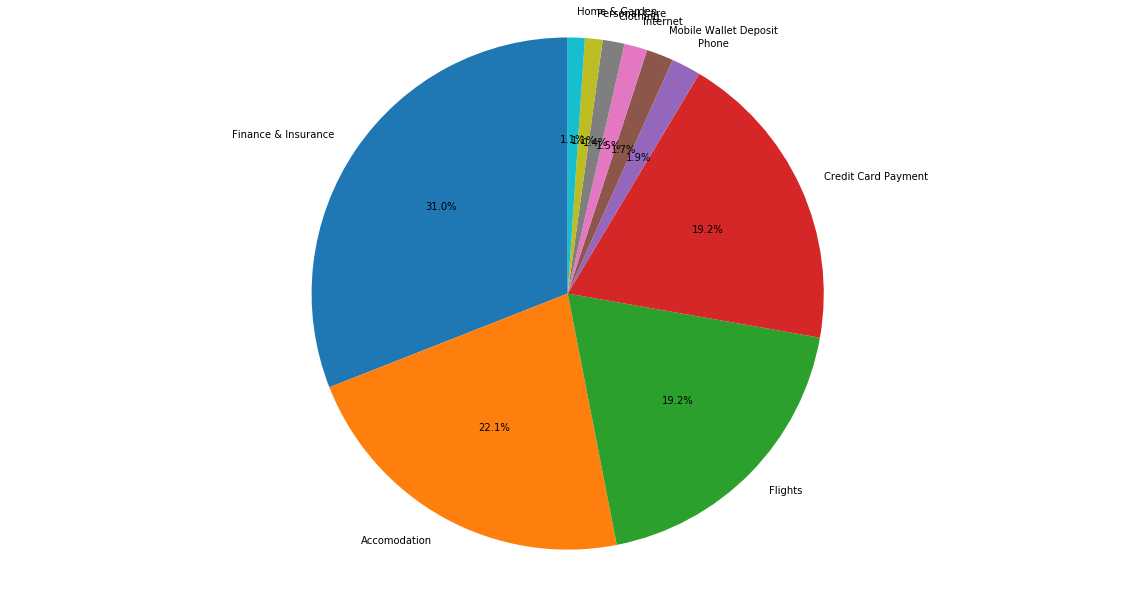

In [167]:
###### Plot the pie chart ###########

plt.pie(sizes, labels=select_labels, 
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.show()


# Question 2
As we can in the last question, the important features necessary to perform the tasks are : 
    1. TransactionDate.1 (we have to define which one we are using, in the above tasks I decided to use the last appeareance of TransactionDate in the .xls file)
    2. TransactionAmount
    3. CategoryTag that gives the different categories. 
    4. TransactionType because we only want the spending. ("debit")
    
**Note :** 
"Nan" values correspond are not considered (see question 3)


# Question 3

If we want to "guess" the categories of nan-values we can try to use different algortihms: 
given a row where there is no value, we calcul its distance to all of the classes with values. The less distance there is between this row and a knonw row the higher the probability of the no value row to be in that known class is.
We can use different neighbors to make that choice. (KNN algorithms)

It is also possible to treat the missing values as a specific type. Then our classificier will just calcul the distance on the other features. There is a risk of building a missing value class if there are too numerous.


# Question 4

To output categorical classifications.
    1. We can use an HCA algorithm with different type of distances such as chi2 or Gower distance . By displaying the inertia gain we can figure out the number of classes we might consider.
    2. A K-mean algortihm can also fit (it could be more accurate). However since the number of the clusters must be specified we can not truely now if the choice the user made is the most accurate. 
    3. It is possible to do the first one and then apply a Kmean algorithm so that we can avoid the Kmean weakness 

    


# Question 5

Here are the steps for the K-mean algorithm : 
    1. Normalize the data set where the data are numeric
    2. Code the data set (there are very numerous methods) 
    4. Calcul the gover distance for each rows
    5. Allocate the rows to the corresponding classes and iterate the process (Kmean)





In [185]:
## normalize the data set first
df_norm = df
mean = df_norm["TransactionAmount"].mean()
var = df_norm["TransactionAmount"].var()
df_norm['TransactionAmount'] = df_norm['TransactionAmount'].apply(func = lambda v: (v-mean)/sqrt(var) )

In [186]:
##gover distance
def gover_distance(df):
    """
    df is a data frame
    """
    pass


# Question 6
To discuss if a model is good or not, we can split the data set df_norm into two datadets df1, df2. We run the classification on the first dataset df1 which is the trained data_set.
Now we have the class so we can run the model on df2. If the category is the same as the one in df_norm the prediction is accurate and we can add increment the score function. 